<a href="https://colab.research.google.com/github/Ameer-Mohammed/test2/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Ameer-Mohammed/test2/main/seed.csv')
df.head(n=25)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,BERHI
5,408953,2326.6931,840.1821,622.0076,0.6722,721.5921,0.9974,410036,BERHI
6,451414,2457.2080,889.3253,652.4316,0.6796,758.1281,0.9970,452755,BERHI
7,382636,2275.7791,808.0833,609.2819,0.6569,697.9880,0.9931,385277,BERHI
8,546063,2714.9480,916.3737,766.4536,0.5481,833.8279,0.9882,552598,BERHI
9,420044,2391.1230,836.9280,645.1822,0.6370,731.3116,0.9918,423531,BERHI


# New Section

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          898 non-null    int64  
 1   PERIMETER     898 non-null    float64
 2   MAJOR_AXIS    898 non-null    float64
 3   MINOR_AXIS    898 non-null    float64
 4   ECCENTRICITY  898 non-null    float64
 5   EQDIASQ       898 non-null    float64
 6   SOLIDITY      898 non-null    float64
 7   CONVEX_AREA   898 non-null    int64  
 8   Class         898 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 63.3+ KB


In [7]:

y = df['Class']
target = df['Class'].to_numpy()

In [8]:
X = df.iloc[:,0:6]
X.head(10)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291
5,408953,2326.6931,840.1821,622.0076,0.6722,721.5921
6,451414,2457.2080,889.3253,652.4316,0.6796,758.1281
7,382636,2275.7791,808.0833,609.2819,0.6569,697.9880
8,546063,2714.9480,916.3737,766.4536,0.5481,833.8279
9,420044,2391.1230,836.9280,645.1822,0.6370,731.3116


In [9]:
X.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
AREA,898.0,298295.207127,107245.205337,1987.0000,206948.000000,319833.00000,382573.000000,546063.0000
PERIMETER,898.0,2057.660953,410.012459,911.8280,1726.091500,2196.34545,2389.716575,2811.9971
MAJOR_AXIS,898.0,750.811994,144.059326,336.7227,641.068650,791.36340,858.633750,1222.7230
MINOR_AXIS,898.0,495.872785,114.268917,2.2832,404.684375,495.05485,589.031700,766.4536
ECCENTRICITY,898.0,0.737468,0.088727,0.3448,0.685625,0.75470,0.802150,1.0000
EQDIASQ,898.0,604.577938,119.593888,50.2984,513.317075,638.14095,697.930525,833.8279


# New Section

In [10]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

# New Section

In [11]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
AREA,898.0,2.215501e-16,1.000557,-2.764444,-0.852235,0.200939,0.786280,2.311580
PERIMETER,898.0,3.165001e-17,1.000557,-2.796187,-0.809132,0.338433,0.810318,1.840814
MAJOR_AXIS,898.0,5.697002e-16,1.000557,-2.876038,-0.762217,0.281648,0.748871,3.277636
MINOR_AXIS,898.0,-1.582501e-17,1.000557,-4.321951,-0.798461,-0.007162,0.815715,2.369250
ECCENTRICITY,898.0,-3.798001e-16,1.000557,-4.428020,-0.584619,0.194323,0.729405,2.960512
EQDIASQ,898.0,-1.899001e-16,1.000557,-4.637264,-0.763515,0.280798,0.781015,1.917972


In [12]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)
     

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

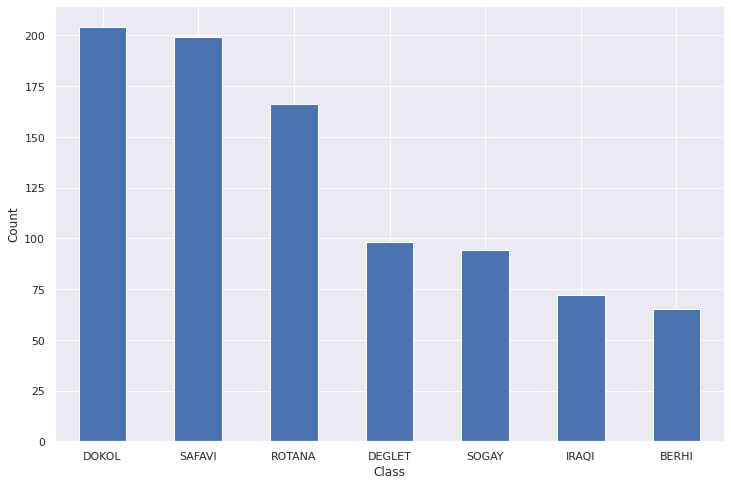

In [13]:

y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


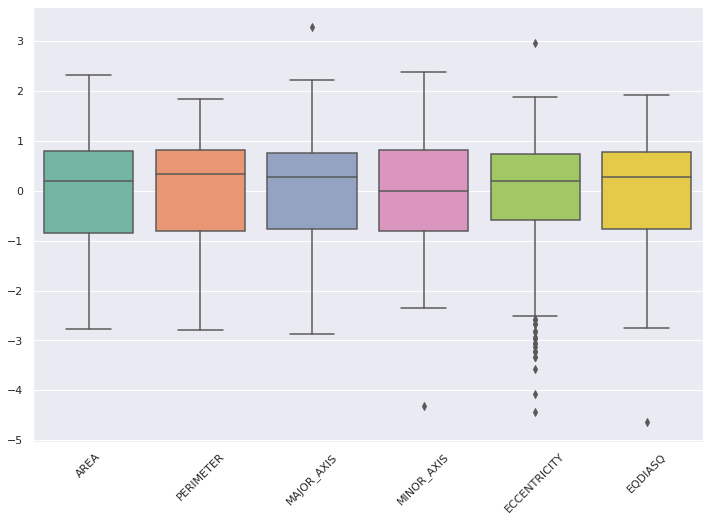

In [14]:

ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

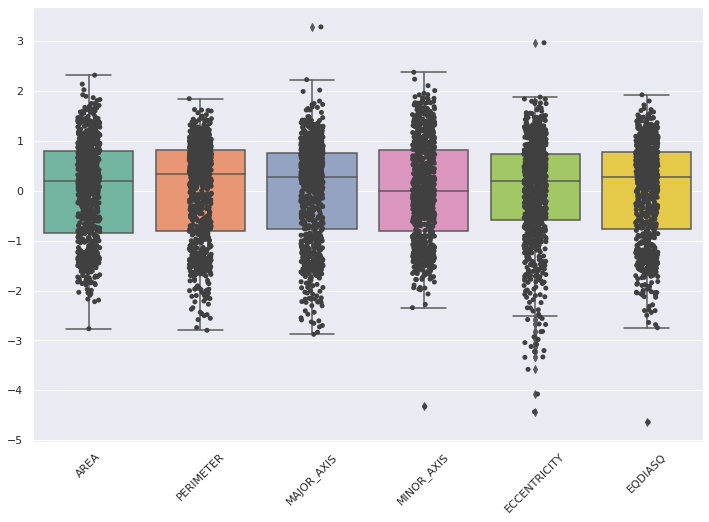

In [15]:
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [16]:
df.describe()


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ
count,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02
mean,2.215501e-16,3.165001e-17,5.697002e-16,-1.582501e-17,-3.798001e-16,-1.899001e-16
std,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00
min,-2.764444e+00,-2.796187e+00,-2.876038e+00,-4.321951e+00,-4.428020e+00,-4.637264e+00
25%,-8.522349e-01,-8.091321e-01,-7.622172e-01,-7.984606e-01,-5.846189e-01,-7.635149e-01
50%,2.009395e-01,3.384331e-01,2.816479e-01,-7.161974e-03,1.943232e-01,2.807979e-01
75%,7.862800e-01,8.103185e-01,7.488709e-01,8.157146e-01,7.294053e-01,7.810149e-01
max,2.311580e+00,1.840814e+00,3.277636e+00,2.369250e+00,2.960512e+00,1.917972e+00


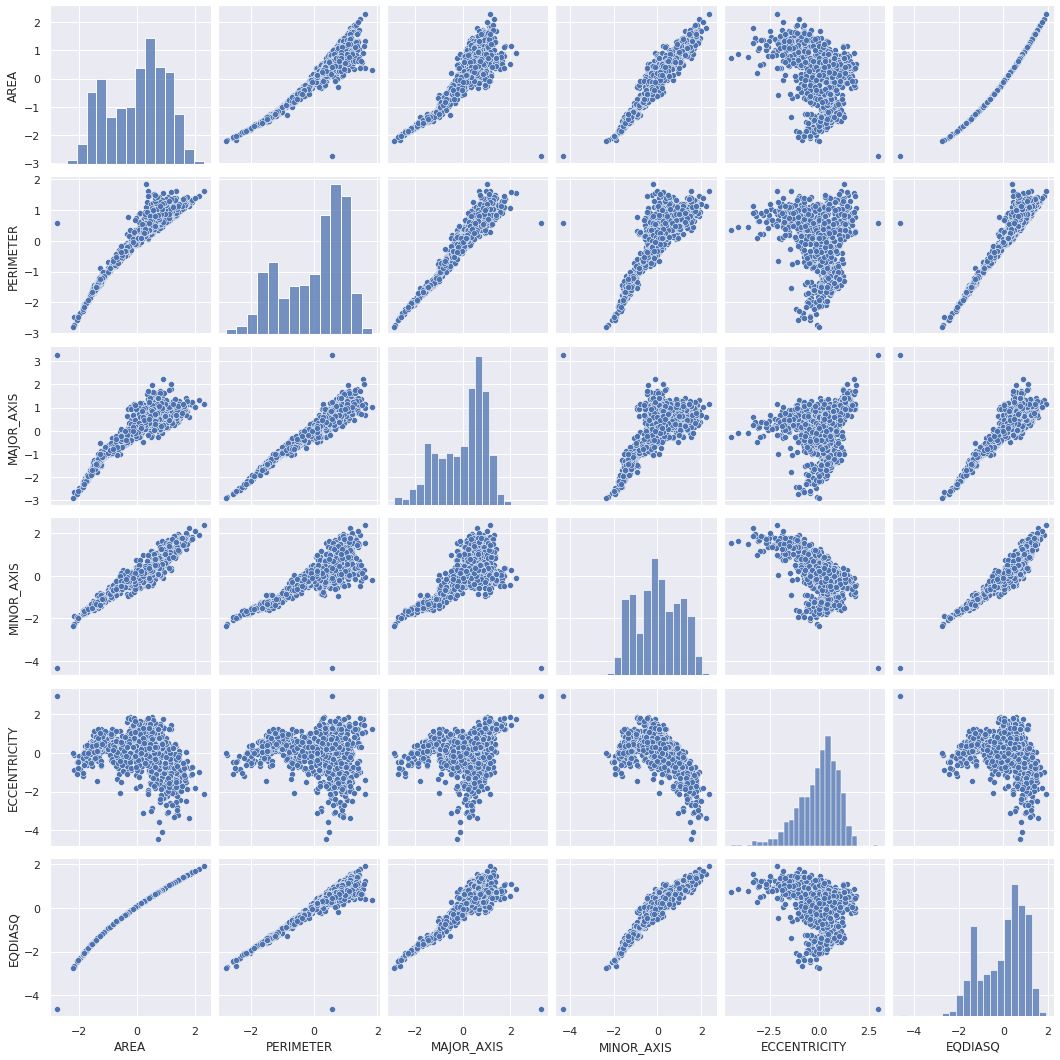

In [17]:
sns.pairplot(df)


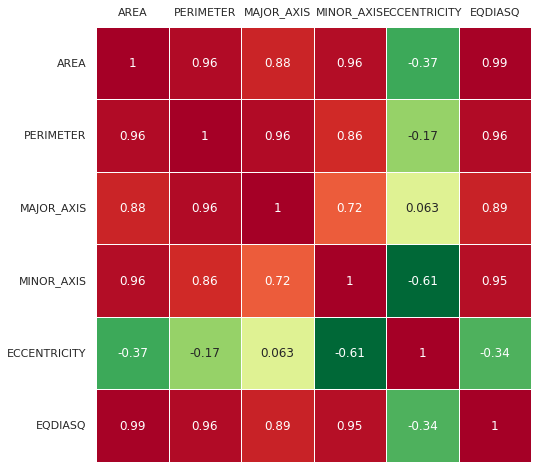

In [18]:

dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

Text(0, 0.5, '$Z_2$')

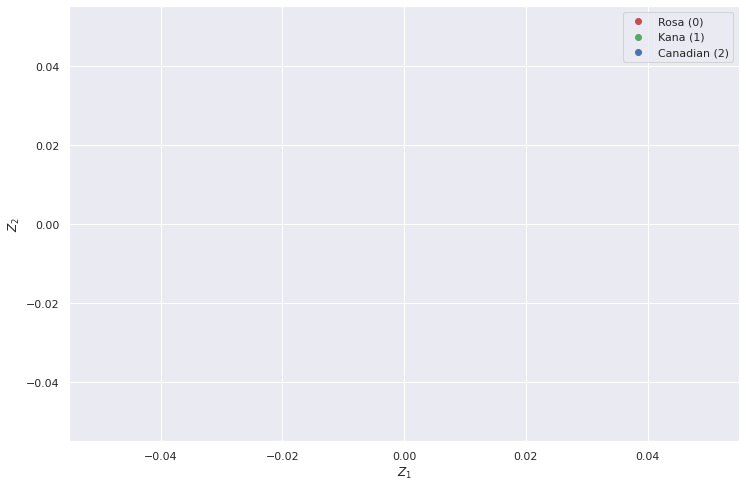

In [20]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

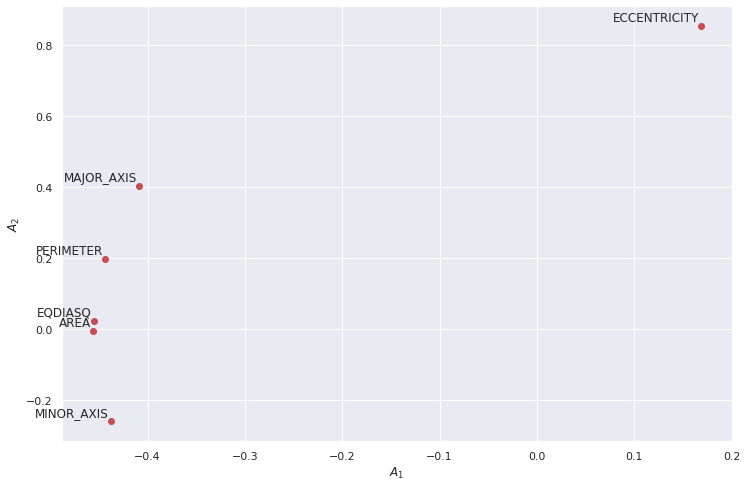

In [21]:
A = pca.components_.T 
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


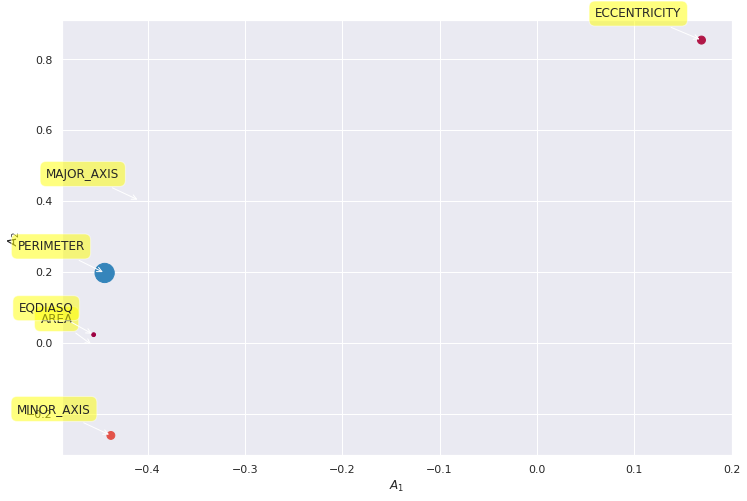

In [22]:

plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

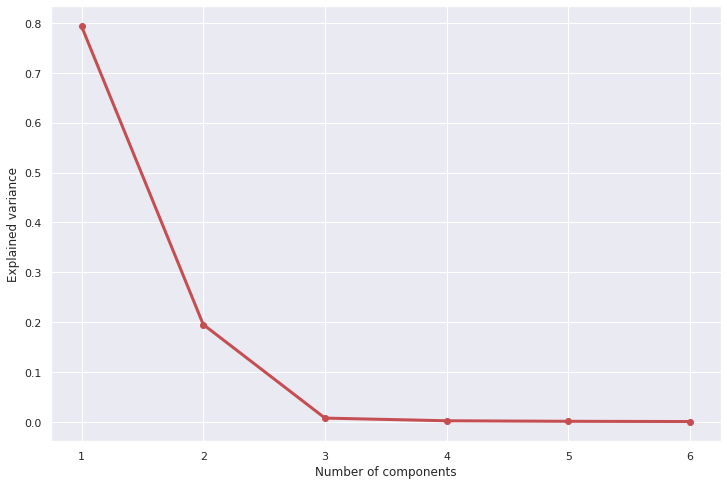

In [23]:
Lambda = pca.explained_variance_ 
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()